In [156]:
import pandas as pd
import numpy as np
import plotly_express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



### Preparación de los datos

In [157]:
data_0 = pd.read_csv("https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_0.csv")
data_1 = pd.read_csv("https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_1.csv")
data_2 = pd.read_csv("https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_2.csv")

In [158]:
print(data_0.info())
display(data_0.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,id,f0,f1,f2,product
40485,5BUmx,-0.139248,0.273179,-2.909030,62.477651
45101,TqSOm,-0.994686,0.333281,-0.821951,41.193960
51191,ouTE4,0.900797,-0.063157,-2.808929,46.999499
23221,ty7B9,0.299643,-0.060850,-4.888196,28.218566
87316,OtOxB,-0.860394,0.264216,5.402231,54.547223


In [159]:
print(data_1.info())
display(data_1.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,id,f0,f1,f2,product
57998,HUF81,9.350793,-1.259348,0.004010,0.000000
66227,Domil,-3.498473,-8.750826,0.001475,3.179103
7260,qLThr,-0.175078,8.764209,2.995737,80.859783
19693,yRHFf,10.980549,-6.379975,3.002152,80.859783
48650,4KLYn,8.509947,-1.821981,0.010558,0.000000


In [160]:
print(data_2.info())
display(data_2.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,id,f0,f1,f2,product
58968,tzSDo,-3.105280,-2.792659,6.689034,140.684823
84244,aF4TZ,0.335524,-1.386283,7.861797,144.634111
84156,HbadM,-4.454823,-1.625946,-3.316058,80.242174
13656,tpVww,2.817730,1.808040,5.652858,128.573743
78212,GmENO,2.129299,0.351776,-5.106175,35.786568


In [161]:
### 2.1

np.random.seed(99)

features = data_0.drop(["product","id"],axis=1)
target = data_0["product"]
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25)

In [162]:
### 2.2

scaler = StandardScaler()
features_train = pd.DataFrame(scaler.fit_transform(features_train))
features_valid = pd.DataFrame(scaler.transform(features_valid))
display(features_train)


,0,1,2
0,1.569197,-0.753778,-0.460283
1,1.725887,-0.228225,0.229196
2,-1.058189,1.255698,-0.022986
3,0.582349,0.708827,0.625476
4,-1.553304,0.795851,1.287509
...,...,...,...
74995,1.113929,-1.254655,0.218222
74996,-1.572083,0.087865,-0.356533
74997,0.640734,-1.530119,-1.412387
74998,-0.203139,1.176828,-0.005336


In [163]:
target_train.describe()

count    75000.000000
mean        92.435116
std         44.288363
min          0.000000
25%         56.482566
50%         91.686317
75%        128.499061
max        185.364347
Name: product, dtype: float64

### Creación del modelo 

In [164]:
## 2.2

LinReg = LinearRegression()
LinReg.fit(features_train, target_train)
predictions = LinReg.predict(features_valid)

mse = mean_squared_error(target_valid, predictions)
mae = mean_absolute_error(target_valid, predictions)

print(f"Raínz del Error Cuadrático Medio: {mse**(1/2)}")
print("R2:", r2_score(target_valid, predictions))
print(f"Error Absoluto Medio: {mae}")
predicted_valid = pd.Series(target_train.median(), index=target_valid.index) 
print("Mediana", mean_absolute_error(target_valid, predicted_valid))
print("Promedio:", predictions.mean())



Raínz del Error Cuadrático Medio: 37.75859856040333
R2: 0.2731615218225071
Error Absoluto Medio: 31.078132176307026
Mediana 37.70448676817076
Promedio: 92.54143347254964


In [165]:

#Función para predecir las reservas de la región
def createModel(data):
    
#Estandarización de los datos
    features = data.drop(["product","id"],axis=1)
    target = data["product"]
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25)
    scaler = StandardScaler()
    features_train = pd.DataFrame(scaler.fit_transform(features_train))
    features_valid = pd.DataFrame(scaler.transform(features_valid))

#Creación del modelo
    LinReg = LinearRegression()
   
    LinReg.fit(features_train, target_train)
    predictions = LinReg.predict(features_valid)
    display(pd.Series(predictions))
    mse = mean_squared_error(target_valid, predictions)
    mae = mean_absolute_error(target_valid, predictions)

    print(f"Raínz del Error Cuadrático Medio: {mse**(1/2)}")
    print("R2:", r2_score(target_valid, predictions))
    print(f"Error Absoluto Medio: {mae}")    
    print("Mediana:", np.median(predictions))
    print("Promedio:", (np.mean(predictions)))

    return predictions, target_valid

In [166]:
predict_0, target_valid_0 = createModel(data_0)

0        102.891221
1         60.497161
2        115.861037
3        142.530794
4         92.337338
            ...    
24995     72.862034
24996    103.756694
24997     63.513878
24998    121.300806
24999     51.391357
Length: 25000, dtype: float64

Raínz del Error Cuadrático Medio: 37.850439570733286
R2: 0.27352448259560425
Error Absoluto Medio: 31.183469477104502
Mediana: 92.35863839745718
Promedio: 92.46586089314623


In [167]:
predict_1, target_valid_1 = createModel(data_1)

0        110.522972
1         27.134105
2        137.269570
3          1.580384
4         27.437326
            ...    
24995     30.487255
24996    108.060709
24997     54.799379
24998     82.059065
24999    138.102887
Length: 25000, dtype: float64

Raínz del Error Cuadrático Medio: 0.891897008344148
R2: 0.9996268204522695
Error Absoluto Medio: 0.7203198644107978
Mediana: 57.755292531901134
Promedio: 68.41524363797912


In [168]:
predict_2, target_valid_2 = createModel(data_2)

0        104.604836
1        104.799572
2        108.512911
3        136.743726
4         89.389960
            ...    
24995     82.649104
24996     77.397696
24997    112.000811
24998     97.690884
24999    109.127029
Length: 25000, dtype: float64

Raínz del Error Cuadrático Medio: 39.94450902888525
R2: 0.2016741575652483
Error Absoluto Medio: 32.71113508785899
Mediana: 94.87475720369602
Promedio: 94.9375848059233


In [169]:

predictions = [predict_0, predict_1, predict_2]


Axes(0.125,0.11;0.775x0.77)


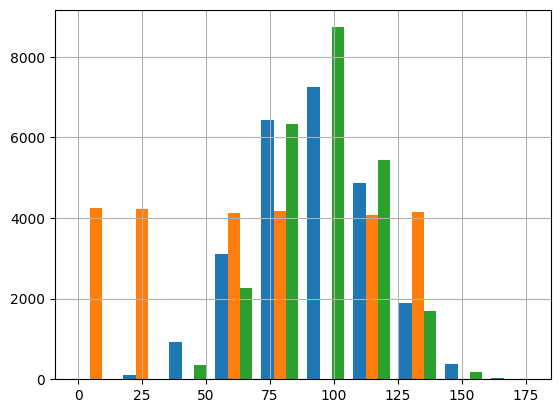

In [170]:
print(pd.Series(predictions).hist())


In [171]:
for i, p in enumerate(predictions):
    print(f"Cantidad media en la región {i + 1}:" , p.mean())

Cantidad media en la región 1: 92.46586089314623
Cantidad media en la región 2: 68.41524363797912
Cantidad media en la región 3: 94.9375848059233


#### Cálculo de ganancias

In [172]:
"""
Para el cálculo de beneficios partimos de los siguientes parámetros
100 millones de inversión por 200 pozos petrolíferos, 
500,000 dólares en unidades para evitar pérdidas (esto es equivalente a 111.1 unidades). 
Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares 
"""

inversion = 100000000
tot_pozos = 200
precio_barril = 4.5
reservas_minimas = ((inversion/tot_pozos)/precio_barril)/1000
best_600 = []
#construir 3 dataframes con predict y target valid
df_0 = pd.DataFrame({"Predictions":predict_0,"Target":target_valid_0})
df_1 = pd.DataFrame({"Predictions":predict_1,"Target":target_valid_1})
df_2 = pd.DataFrame({"Predictions":predict_2,"Target":target_valid_2})

def ganancias(region):
    #ordenar de mayor a menor (el df) de las predicciones by=predcitions
    best_200 = region.sort_values(by="Predictions", ascending = False).head(200)
    tot_income = sum(best_200["Target"])*4.5*1000
    profit = tot_income - inversion
    return profit

for i, p in enumerate([df_0, df_1, df_2]):
    print(f"Ganancias potenciales para la región {i + 1}:" , "${:,.0f}".format(ganancias(p)))

Ganancias potenciales para la región 1: $31,933,546
Ganancias potenciales para la región 2: $24,150,867
Ganancias potenciales para la región 3: $26,331,320


### Bootstraping para el cáclulo de beneficios

In [173]:
def bootstrap_calc(region):
    state = np.random.RandomState(12345)
    values = []
    for i in range(1000):
        subsample = region.sample(n=500, replace=True, random_state=state)
        values.append(ganancias(subsample))

    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)

    print(lower)
    print(upper)
    print(values.mean())
    print("Riesgo de pérdidas:",(values < 0).mean())
    return(values)

### Selección de la mejor región (con menor riesgo)

-1006661.7920318181
9185628.571056562
3924823.5559344306
Riesgo de pérdidas: 0.067
Axes(0.125,0.11;0.775x0.77)


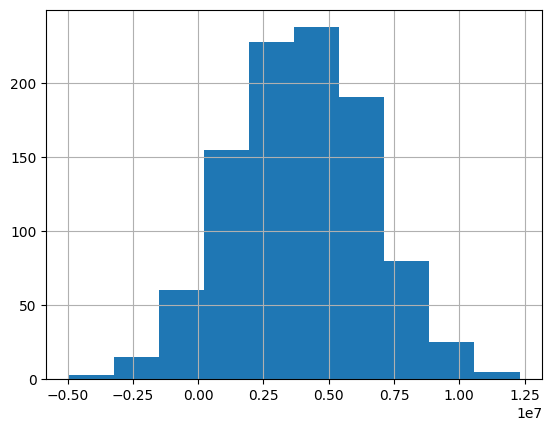

In [174]:
print(pd.Series(bootstrap_calc(df_0)).hist())


538473.0067736332
8629707.20213668
4447599.412589766
Riesgo de pérdidas: 0.013
Axes(0.125,0.11;0.775x0.77)


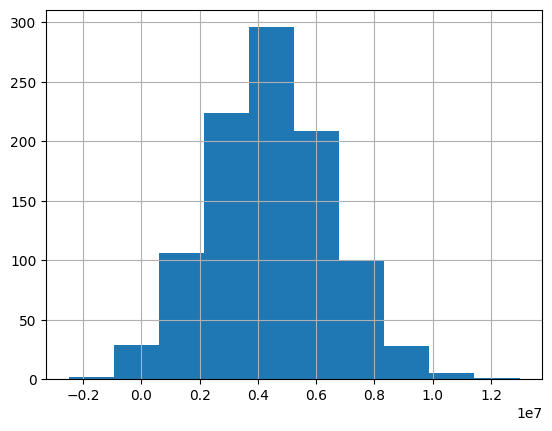

In [175]:
print(pd.Series(bootstrap_calc(df_1)).hist())


-1477942.5449837558
8678044.629987717
3719044.854411178
Riesgo de pérdidas: 0.076
Axes(0.125,0.11;0.775x0.77)


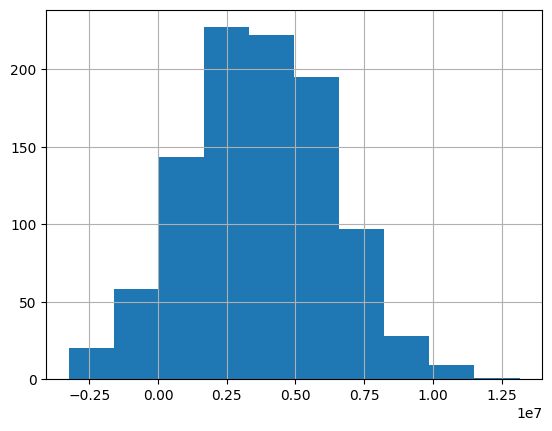

In [176]:
print(pd.Series(bootstrap_calc(df_2)).hist())


5.2 

A partir de los ultimos calculos utilizando técnicas de bootstraping, decidimos que la mejor opción para crear los 200 pozos es en la región 2, ya que el riesgo de pérdidas es el menor de todos

### Conclusiones

En este proyecto pudimos volver a practicar la creacion de modelos de ml, pero esta vez integrarlos en una función para poder aplicarlos a diferentes datasets. Además, agregamos diferentes pasos para el cálculo de ganancias de  cada una de  las regiones prospecto. Finalmente, utilizamos la técnica de bootstrapping con 1000 muestras para explorar la distribución de beneficios, encontrando el beneficio promedio, el intervalo de confianza del 95% y el riesgo de pérdidas. 
